In [1]:
import sys
sys.path.append("../")
import numpy as np
from pyunlocbox import functions
import matplotlib.pyplot as plt
import varprons as vpns
from regularizers import norm_l1_pos
from applications import ExpFit

## Example 1

In [13]:
# settings
rng = np.random.default_rng(seed=6)
m = 11
n = 5
k = 1
t = np.linspace(0,5,m)
xt = np.array([0.1,1.5,0,0,0])
yt = np.array([2.1,1.9,0,0,0])

# create instance
example1 = ExpFit(t,xt,yt,noise='gaussian',sigma=0.1)

# objective
f = lambda x,y : example1.misfit(x = x,y = y)
r1 = functions.dummy()
r2 = norm_l1_pos(lambda_ = 1)
        
# optimization parameters
Lyy = k*np.linalg.norm(example1.getA(xt),ord=2)**2
L = 1e3
Lb = 1e3
otol = 3.74
itol = 1e-3
maxit = 5000
rho = 1

In [14]:
# initial points
x0 = np.array([0,1,2,3,4])
y0 = example1.inner_solve(x0,np.zeros(5),Lyy = Lyy,r2=r2)

# algorithm1
res1 = vpns.algorithm1(f,r1,r2,x0,y0,L=(L,L),tol=otol,maxit = maxit)
x1 = res1['sol'][0]
y1 = res1['sol'][1]

# algorithm 2
res2 = vpns.algorithm2(f,r1,r2,x0,y0,L=(Lb,Lyy),tol=(otol,itol),maxit=(maxit,1000))
x2 = res2['sol'][0]
y2 = res2['sol'][1]

# algorithm 3 adaptive, .1*rho
res3 = vpns.algorithm3(f,r1,r2,x0,y0,L=(Lb,Lyy),rho = .1*rho, tol=otol,maxit=(maxit,1000))
x3 = res3['sol'][0]
y3 = res3['sol'][1]

# algorithm 4 adaptive, 1*rho
res4 = vpns.algorithm3(f,r1,r2,x0,y0,L=(Lb,Lyy),rho = rho, tol=otol,maxit=(maxit,1000))
x4 = res4['sol'][0]
y4 = res4['sol'][1]

# algorithm 4 adaptive, 10*rho
res5 = vpns.algorithm3(f,r1,r2,x0,y0,L=(Lb,Lyy),rho = 10*rho, tol=otol,maxit=(maxit,1000))
x5 = res5['sol'][0]
y5 = res5['sol'][1]

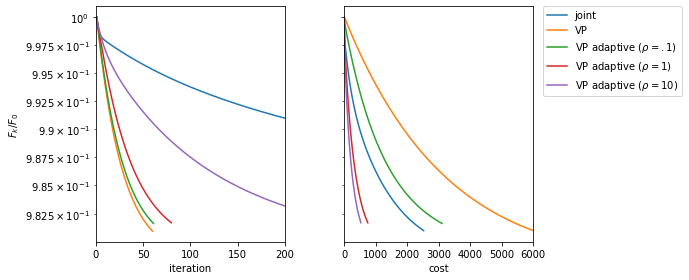

In [15]:
# plot convergence
fig, ax = vpns.plot_convergence([res1,res2,res3,res4,res5],['joint','VP',r'VP adaptive ($\rho=.1$)',r'VP adaptive ($\rho=1$)',r'VP adaptive ($\rho=10$)'])
ax[0].set_xlim((0,200))
ax[1].set_xlim((0,6000))

fig.tight_layout()
fig.set_figwidth(15)

plt.savefig('./results/expfit_1a.eps',dpi=300)

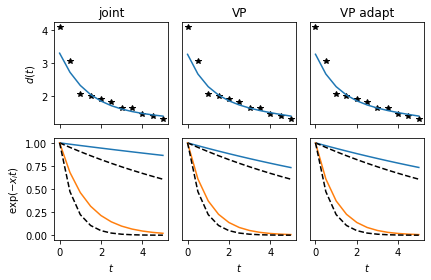

In [5]:
fig, ax = example1.plot_results([(x1,y1),(x2,y2),(x3,y3)],['joint','VP','VP adapt'])

fig.tight_layout()
plt.savefig('./results/expfit_1b.eps',dpi=300)

# Example 2

In [6]:
# settings
rng = np.random.default_rng(seed=6)
m = 11
n = 5
k = 1
t = np.linspace(0,5,m)
xt = np.array([0.1,1.5,0,0,0])
yt = np.array([21,19,0,0,0])

# creat instance
example2 = ExpFit(t,xt,yt,noise='poisson')

# objective
f = lambda x,y : example2.misfit(x = x,y = y)
r1 = functions.dummy()
r2 = norm_l1_pos(lambda_ = 1e-1)
        
# optimization parameters
Lyy = k*np.linalg.norm(example2.getA(xt),ord=2)**2
L = 5e4
Lb = 5e4
otol = 36.08
itol = 1e-3
maxit = 100000
rho = 5

In [7]:
# initial points
x0 = np.array([0,1,2,3,4])
y0 = example2.inner_solve(x0,np.ones(5),Lyy = Lyy,r2=r2)

# algorithm1
res1 = vpns.algorithm1(f,r1,r2,x0,y0,L=(L,L),tol=otol,maxit = maxit)
x1 = res1['sol'][0]
y1 = res1['sol'][1]

# algorithm 2
res2 = vpns.algorithm2(f,r1,r2,x0,y0,L=(Lb,Lyy),tol=(otol,itol),maxit=(maxit,1000))
x2 = res2['sol'][0]
y2 = res2['sol'][1]

# algorithm 3 adaptive, .1*rho
res3 = vpns.algorithm3(f,r1,r2,x0,y0,L=(Lb,Lyy),rho = .1*rho, tol=otol,maxit=(maxit,1000))
x3 = res3['sol'][0]
y3 = res3['sol'][1]

# algorithm 3 adaptive, 1*rho
res4 = vpns.algorithm3(f,r1,r2,x0,y0,L=(Lb,Lyy),rho = rho, tol=otol,maxit=(maxit,1000))
x4 = res3['sol'][0]
y4 = res3['sol'][1]

# algorithm 3 adaptive, 10*rho
res5 = vpns.algorithm3(f,r1,r2,x0,y0,L=(Lb,Lyy),rho = 10*rho, tol=otol,maxit=(maxit,1000))
x5 = res3['sol'][0]
y5 = res3['sol'][1]

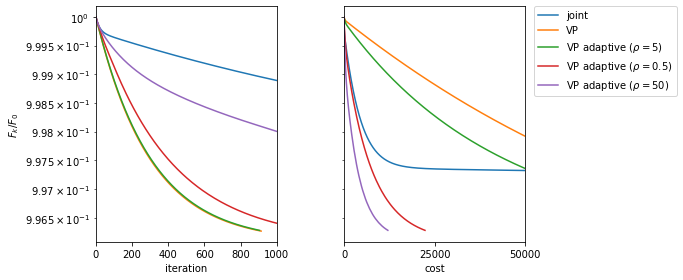

In [8]:
# plot convergence
fig, ax = vpns.plot_convergence([res1,res2,res3,res4,res5], ['joint','VP',r'VP adaptive ($\rho=5$)',r'VP adaptive ($\rho=0.5$)',r'VP adaptive ($\rho=50$)'])
ax[0].set_xlim([0,1000])
ax[1].set_xlim([0,50000])
ax[1].set_xticks([0,25000,50000])


fig.tight_layout()
fig.set_figwidth(15)

plt.savefig('./results/expfit_2a.eps',dpi=300)

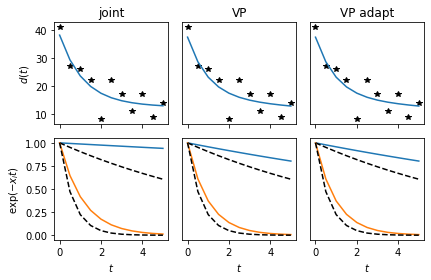

In [9]:
fig,ax=example2.plot_results([(x1,y1),(x2,y2),(x3,y3)],['joint','VP','VP adapt'])

fig.tight_layout()
plt.savefig('./results/expfit_2b.eps',dpi=300)